In [ ]:
# Need to Make Person folder and Label wise Images
# Create some folder to detect Your Friend Images 

# Image Normalize and trained via Convolutional Model

In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 3: Load and Preprocess the Dataset
image_size = (64, 64)  # Resize images to a smaller size for simplicity
batch_size = 2  # You can increase the batch size if you have more memory

train_data_generator = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
train_data = train_data_generator.flow_from_directory(
    directory='person_images',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

num_classes = len(train_data.class_indices)



Found 14 images belonging to 4 classes.


In [12]:
# Step 4: Define the CNN Model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

# Step 5: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the Model
epochs = 20  # Increase the number of epochs if needed
model.fit(train_data, epochs=epochs)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

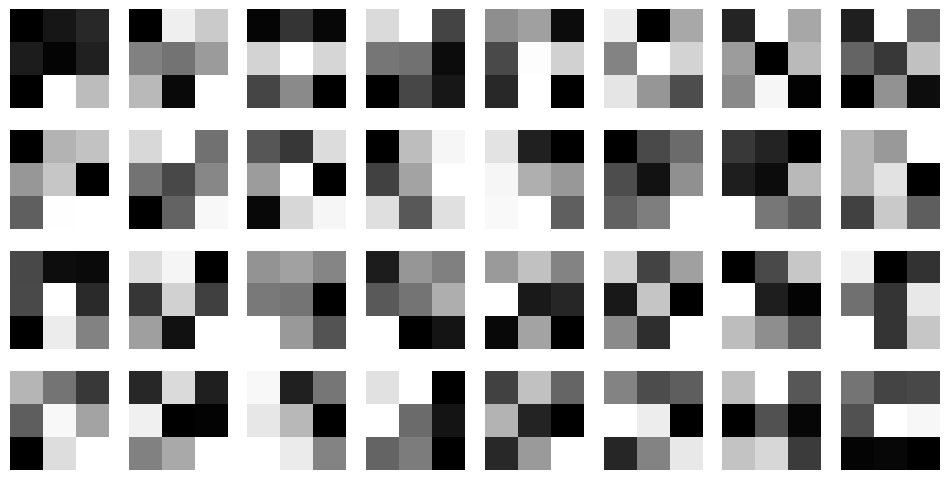

In [22]:
# Get the weights of the first convolutional layer (assuming it is the first layer)
conv1_layer = model.get_layer(index=0)
conv1_weights = conv1_layer.get_weights()[0]

# Normalize the weights to [0, 1] for visualization
normalized_weights = (conv1_weights - np.min(conv1_weights)) / (np.max(conv1_weights) - np.min(conv1_weights))

# Plot the filters as images
num_filters = conv1_weights.shape[-1]
fig, axs = plt.subplots(4, 8, figsize=(12, 6))
axs = axs.flatten()

for i in range(num_filters):
    axs[i].imshow(normalized_weights[:, :, 0, i], cmap='gray')
    axs[i].axis('off')

plt.show()


In [56]:
import cv2
import matplotlib.pyplot as  plt 
test_image_path = 'test2.png'
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size=image_size)
# img = cv2.imread(test_image_path)
# cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)
# plt.show()



test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalize the test image

# Make the prediction
prediction = model.predict(test_image)
predicted_class = np.argmax(prediction)

# Get the class labels from the training data generator
class_labels = list(train_data.class_indices.keys())

# Get the predicted person's name
predicted_person = class_labels[predicted_class]

print("Predicted Person:", predicted_person)


1/1 [==============================] - 0s 23ms/step
Predicted Person: aysh
